### Hypothesis 1: A decline in equity value increases default probability.

# DELETE LATER
### Expected result: negative correlation between percent change in market cap and percent change in default probability. This should be pretty straightforward.

### Possible extensions: look at this correlation for different sectors or different leverages

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('../model/merton_model_output.csv')
df_valid = df[df['merton_pd'].notna()].copy()
df_valid['log_E'] = np.log(df_valid['market_cap'])

### Pearson and Spearman correlations between market_cap and merton_pd

In [3]:
pearson_corr, pearson_pval = pearsonr(df_valid['market_cap'], df_valid['merton_pd'])
spearman_corr, spearman_pval = spearmanr(df_valid['market_cap'], df_valid['merton_pd'])
print(f"Pearson r = {pearson_corr:.4f}, p = {pearson_pval:.4g}")
print(f"Spearman ρ = {spearman_corr:.4f}, p = {spearman_pval:.4g}")

Pearson r = -0.0132, p = 1.617e-15
Spearman ρ = -0.0811, p = 0


### Pearson and Spearman correlations between log_E (log(market_cap)) and merton_pd

In [4]:
pearson_corr, pearson_pval = pearsonr(df_valid['log_E'], df_valid['merton_pd'])
spearman_corr, spearman_pval = spearmanr(df_valid['log_E'], df_valid['merton_pd'])
print(f"Pearson r = {pearson_corr:.4f}, p = {pearson_pval:.4g}")
print(f"Spearman ρ = {spearman_corr:.4f}, p = {spearman_pval:.4g}")

Pearson r = -0.0690, p = 0
Spearman ρ = -0.0811, p = 0


### Run a regression

In [5]:
import statsmodels.api as sm

X = sm.add_constant(df_valid['log_E'])
y = df_valid['merton_pd']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              merton_pd   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1738.
Date:                Wed, 09 Apr 2025   Prob (F-statistic):               0.00
Time:                        15:54:29   Log-Likelihood:             1.0562e+06
No. Observations:              362879   AIC:                        -2.112e+06
Df Residuals:                  362877   BIC:                        -2.112e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0252      0.001     42.237      0.0

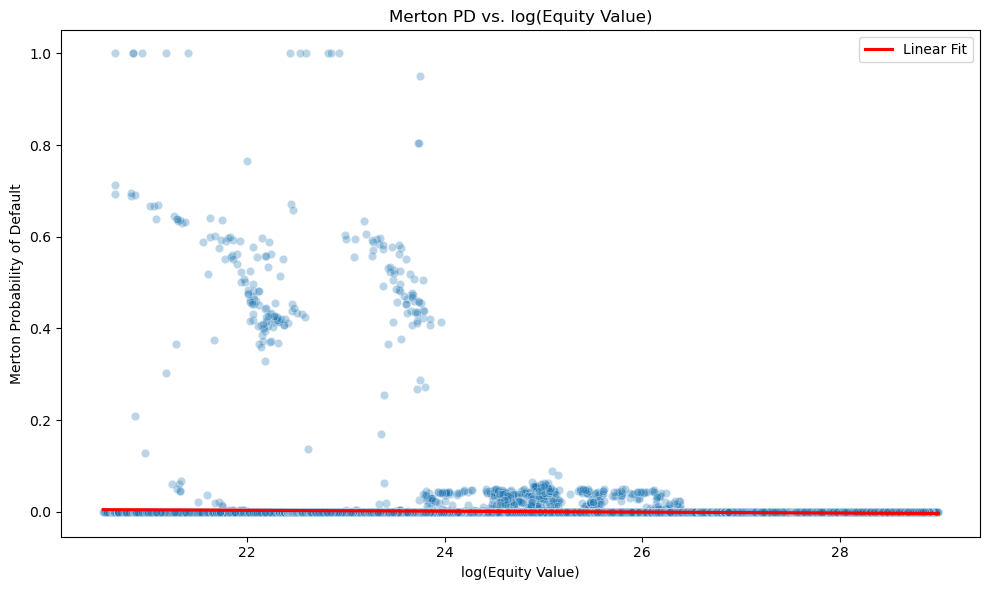

In [6]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df_valid, x='log_E', y='merton_pd', alpha=0.3)
sns.regplot(data=df_valid, x='log_E', y='merton_pd', scatter=False, color='red', label='Linear Fit')

plt.title('Merton PD vs. log(Equity Value)')
plt.xlabel('log(Equity Value)')
plt.ylabel('Merton Probability of Default')
plt.legend()
plt.tight_layout()
plt.show()